In [1]:
# Dependencies
import numpy as np
import pandas as pd

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,claimmode_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,None,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0


In [6]:
CountryAttacksDF = gtdDF[['index1','country_txt']]
CountryAttacksDF.head()


,index1,country_txt
0,1.0,Namibia
1,2.0,Namibia
2,3.0,India
3,4.0,Kosovo
4,5.0,Somalia


In [7]:
# Group countries by attack counts
CountryGroupDF = CountryAttacksDF.groupby(['country_txt']).count()
CountryGroupDF = CountryGroupDF.reset_index()
CountryGroupDF = CountryGroupDF.rename(columns = {'index1':'Attack Count'})
CountryGroupDF = CountryGroupDF.sort_values(by='Attack Count', ascending = False)
CountryGroupDF.head()

,country_txt,Attack Count
67,Iraq,20729
108,Pakistan,11443
0,Afghanistan,10450
63,India,7594
112,Philippines,4061


In [8]:
# Filter countries by removing those with count = 1
CountryFilterDF = CountryGroupDF.loc[(CountryGroupDF['Attack Count'] >= 2)]
CountryFilterDF.head()

,country_txt,Attack Count
67,Iraq,20729
108,Pakistan,11443
0,Afghanistan,10450
63,India,7594
112,Philippines,4061


In [9]:
# Here filter countries
# This is needed to fix error with training data not in testing
filterList = ['Western Sahara','Costa Rica','Malawi','Equatorial Guinea','Gambia','Cuba','Togo','Romania',
             'Bahamas','St. Lucia','Slovenia','International']
CountryAttacksFilterDF = CountryAttacksDF[~CountryAttacksDF['country_txt'].isin(filterList)]
CountryAttacksFilterDF.head()

,index1,country_txt
0,1.0,Namibia
1,2.0,Namibia
2,3.0,India
3,4.0,Kosovo
4,5.0,Somalia


In [10]:
CountryAttacks2DF = pd.get_dummies(CountryAttacksFilterDF)
CountryAttacks2DF.head()

,index1,country_txt_Afghanistan,country_txt_Albania,country_txt_Algeria,country_txt_Angola,country_txt_Argentina,country_txt_Armenia,country_txt_Australia,country_txt_Austria,country_txt_Azerbaijan,...,country_txt_United States,country_txt_Uruguay,country_txt_Uzbekistan,country_txt_Venezuela,country_txt_Vietnam,country_txt_West Bank and Gaza Strip,country_txt_Yemen,country_txt_Yugoslavia,country_txt_Zambia,country_txt_Zimbabwe
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
CountryAttacksMergeDF = result = pd.merge(CountryAttacks2DF,CountryAttacksFilterDF[['index1','country_txt']],on='index1')
# below code will remove the country_txt_ prefix from all countries columns
CountryAttacksMergeDF.columns = CountryAttacksMergeDF.columns.str.replace('country_txt_', '')
CountryAttacksMergeDF.head()

,index1,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza Strip,Yemen,Yugoslavia,Zambia,Zimbabwe,country_txt
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Namibia
1,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Namibia
2,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,India
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kosovo
4,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Somalia


In [12]:
# Assign X (data) and y (target)
X = CountryAttacksMergeDF.drop(["index1","country_txt"], axis=1)
y = CountryAttacksMergeDF["country_txt"]
feature_names = X.columns

print(X.shape, y.shape)

(92688, 152) (92688,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

C:\Users\kruiz\Anaconda3\envs\PythonData\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=152))
model.add(Dense(units=128, activation='relu'))
# Below value should be number of variables
model.add(Dense(units=152, activation='softmax'))

In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=20,
    shuffle=True,
    verbose=2
)

Epoch 1/20
 - 8s - loss: 0.1159 - acc: 0.9901
Epoch 2/20
 - 8s - loss: 0.0070 - acc: 0.9996
Epoch 3/20
 - 7s - loss: 0.0036 - acc: 0.9998
Epoch 4/20
 - 8s - loss: 0.0016 - acc: 0.9999
Epoch 5/20
 - 8s - loss: 9.2873e-04 - acc: 0.9999
Epoch 6/20
 - 8s - loss: 9.2781e-04 - acc: 0.9999
Epoch 7/20
 - 8s - loss: 9.2762e-04 - acc: 0.9999
Epoch 8/20
 - 7s - loss: 9.2758e-04 - acc: 0.9999
Epoch 9/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 10/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 11/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 12/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 13/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 14/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 15/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 16/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 17/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 18/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 19/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999
Epoch 20/20
 - 7s - loss: 9.2757e-04 - acc: 0.9999


In [16]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.002782458841708088, Accuracy: 0.9998273778698429


In [17]:
encoded_predictions = model.predict_classes(X_test_scaled[:12])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

C:\Users\kruiz\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:20])}")

Predicted classes: ['Yemen' 'Iraq' 'Afghanistan' 'Afghanistan' 'Philippines' 'Pakistan'
 'Iraq' 'Turkey' 'Pakistan' 'Iraq' 'Colombia' 'Pakistan']
Actual Labels: ['Yemen', 'Iraq', 'Afghanistan', 'Afghanistan', 'Philippines', 'Pakistan', 'Iraq', 'Turkey', 'Pakistan', 'Iraq', 'Colombia', 'Pakistan', 'Nigeria', 'India', 'Nigeria', 'Iraq', 'Iraq', 'Pakistan', 'India', 'Ivory Coast']


In [19]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
sorted(zip(model.feature_importances_, feature_names), reverse=True)

[(0.08348356, 'Philippines'),
 (0.07002316, 'Thailand'),
 (0.053243186, 'Yemen'),
 (0.05095281, 'Somalia'),
 (0.049774416, 'Nigeria'),
 (0.039322592, 'India'),
 (0.039017215, 'Colombia'),
 (0.03743368, 'Russia'),
 (0.03676955, 'Libya'),
 (0.035031974, 'Egypt'),
 (0.03334086, 'Turkey'),
 (0.032276746, 'Ukraine'),
 (0.028324928, 'Syria'),
 (0.027586088, 'Algeria'),
 (0.026055133, 'West Bank and Gaza Strip'),
 (0.02379923, 'Israel'),
 (0.022566942, 'Bangladesh'),
 (0.021044286, 'United Kingdom'),
 (0.020267367, 'Iraq'),
 (0.01935878, 'Nepal'),
 (0.018821966, 'Afghanistan'),
 (0.018465295, 'Pakistan'),
 (0.017226527, 'Sri Lanka'),
 (0.01256862, 'Lebanon'),
 (0.012518975, 'Sudan'),
 (0.011279069, 'Indonesia'),
 (0.01105619, 'Greece'),
 (0.010289397, 'Democratic Republic of the Congo'),
 (0.010264689, 'Kenya'),
 (0.009314836, 'Spain'),
 (0.008941408, 'United States'),
 (0.008692806, 'France'),
 (0.007159397, 'Mali'),
 (0.006864597, 'Burundi'),
 (0.005428977, 'Saudi Arabia'),
 (0.004503575, '

In [21]:
DLAttacksCountryDF = pd.DataFrame(sorted(zip(model.feature_importances_, feature_names), reverse=True), 
                               columns = ['Probability', 'Country'])
DLAttacksCountryDF.head()

,Probability,Country
0,0.083484,Philippines
1,0.070023,Thailand
2,0.053243,Yemen
3,0.050953,Somalia
4,0.049774,Nigeria


In [22]:
pies = DLAttacksCountryDF['Country'].head(15)
pie_slices = DLAttacksCountryDF['Probability'].head(15)
colors = ["lightskyblue","orange","pink","yellowgreen","lightcoral","silver","yellow",
          "lightgreen","wheat","khaki",
          "lightskyblue","orange","pink","yellowgreen","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0
          ,0,0,0,0,0)

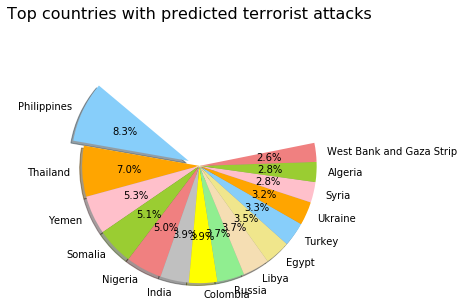

In [23]:
# Tell matplotlib to create a pie chart based upon the above data
pyplot.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
pyplot.axis("equal")
# Save an image of our chart and print the final product to the screen

pyplot.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML17_Country_Attacks_Pie_DL")
pyplot.suptitle('Top countries with predicted terrorist attacks', size=16, y=1.12) 
pyplot.show()

In [24]:
DLTop15CountryDF = DLAttacksCountryDF.head(15)
DLTop15CountryDF

,Probability,Country
0,0.083484,Philippines
1,0.070023,Thailand
2,0.053243,Yemen
3,0.050953,Somalia
4,0.049774,Nigeria
5,0.039323,India
6,0.039017,Colombia
7,0.037434,Russia
8,0.036770,Libya
9,0.035032,Egypt


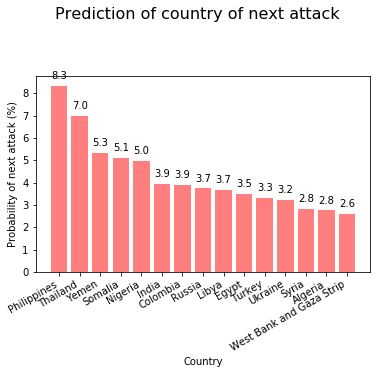

In [25]:
y_axis = DLTop15CountryDF['Probability']*100
x_axis = DLTop15CountryDF['Country']
fig, ax = pyplot.subplots()
# plot
ax.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# Labels for x and y axes
pyplot.xlabel("Country")
pyplot.ylabel("Probability of next attack (%)")

# Show the values of each probability on plot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Save an image of our chart and print the final product to the screen
pyplot.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML17_Country_Attacks_Bar_DL")
# Title for the chart
pyplot.suptitle('Prediction of country of next attack', size=16, y=1.12) 
pyplot.show()
